------------

# 处理数据

In [15]:
import pandas as pd

# 读取数据
df = pd.read_csv("./esports dataset/my/games_player_champion_combined.csv")

# 初始化字典统计胜负
player_stats = {}

# 遍历每一场比赛
for idx, row in df.iterrows():
    # 胜方玩家
    for p in row[['win1','win2','win3','win4','win5']]:
        if p != "_NOOB_" and pd.notna(p):
            if p not in player_stats:
                player_stats[p] = {'win':0, 'total':0}
            player_stats[p]['win'] += 1
            player_stats[p]['total'] += 1
    # 败方玩家
    for p in row[['lose1','lose2','lose3','lose4','lose5']]:
        if p != "_NOOB_" and pd.notna(p):
            if p not in player_stats:
                player_stats[p] = {'win':0, 'total':0}
            player_stats[p]['total'] += 1

# 转成 DataFrame，包括胜场数、总场数和胜率
data = []
for p, stats in player_stats.items():
    win = stats['win']
    total = stats['total']
    winrate = win / total if total > 0 else 0
    data.append({'player': p, 'win': win, 'total': total, 'winrate': round(winrate, 3)})

df_winrate = pd.DataFrame(data)
df_winrate = df_winrate.sort_values(by='winrate', ascending=False)

# 保存结果
df_winrate.to_csv("player_winrate_with_counts.csv", index=False, encoding="utf-8-sig")
print(df_winrate)


            player  win  total  winrate
0    Tactical_暴走萝莉    1      1      1.0
727    Crisp_魂锁典狱长    1      1      1.0
700    Trymbi_法外狂徒    1      1      1.0
701       FBI_残月之肃    3      3      1.0
705  Gumayusi_暗夜猎手    1      1      1.0
..             ...  ...    ...      ...
680   Humanoid_戏命师    0      1      0.0
943    Chovy_猩红收割者    0      1      0.0
942      Clid_影流之镰    0      1      0.0
683    Iwandy_无双剑姬    0      1      0.0
420     Viper_复仇焰魂    0      1      0.0

[1247 rows x 4 columns]


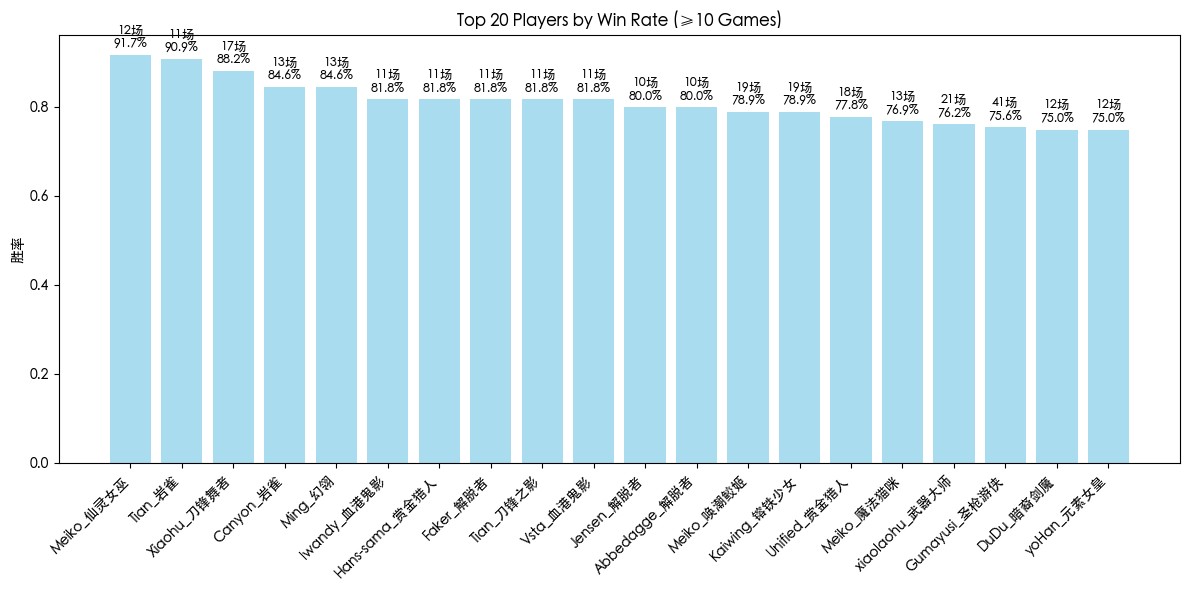

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams, font_manager

plt.rcParams['font.family'] = 'Heiti TC'  # 替换为你选择的字体

# 读取数据
df = pd.read_csv("./Esports dataset/my/player_winrate_with_counts.csv")
df = df[df['total'] >= 10]
top = df.sort_values(by='winrate', ascending=False).head(20)

plt.figure(figsize=(12,6))
bars = plt.bar(top['player'], top['winrate'], alpha=0.7, color='skyblue')

for bar, total, winrate in zip(bars, top['total'], top['winrate']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{int(total)}场\n{winrate*100:.1f}%", 
             ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.ylabel("胜率")
plt.title("Top 20 Players by Win Rate (≥10 Games)")
plt.tight_layout()
plt.show()


In [29]:
import pandas as pd

# 读取 CSV
df = pd.read_csv("./esports dataset/my/games_player_champion_combined.csv")

# 定义位置列
win_cols = ['win1','win2','win3','win4','win5']
lose_cols = ['lose1','lose2','lose3','lose4','lose5']

# ==== 1️⃣ 按位置统计玩家胜率 ====
position_player_stats = {i: {} for i in range(5)}  # 0~4位置

for idx, row in df.iterrows():
    for i in range(5):
        # 胜方
        p_champ = row[win_cols[i]]
        if pd.notna(p_champ) and p_champ != "_NOOB_":
            player, _ = p_champ.split('_')
            stats = position_player_stats[i].setdefault(player, {'win':0,'total':0})
            stats['win'] += 1
            stats['total'] += 1
        # 败方
        p_champ = row[lose_cols[i]]
        if pd.notna(p_champ) and p_champ != "_NOOB_":
            player, _ = p_champ.split('_')
            stats = position_player_stats[i].setdefault(player, {'win':0,'total':0})
            stats['total'] += 1

# 转 DataFrame 并排序，筛选 total ≥ 20
position_player_df = {}
for i in range(5):
    data = []
    for player, stats in position_player_stats[i].items():
        if stats['total'] >= 20:  # 筛选总场次≥20
            winrate = stats['win'] / stats['total'] if stats['total']>0 else 0
            data.append({'player': player, 'win': stats['win'], 'total': stats['total'], 'winrate': round(winrate,3)})
    df_pos = pd.DataFrame(data).sort_values(by='winrate', ascending=False)
    position_player_df[i+1] = df_pos  # 位置编号 1~5
    print(f"=== 位置{i+1} 玩家胜率排名（总场次≥20） ===")
    print(df_pos.head(10), '\n')  # 打印前10名

# ==== 2️⃣ 按位置统计英雄胜率 ====
position_champ_stats = {i: {} for i in range(5)}

for idx, row in df.iterrows():
    for i in range(5):
        # 胜方
        p_champ = row[win_cols[i]]
        if pd.notna(p_champ) and p_champ != "_NOOB_":
            _, champ = p_champ.split('_')
            stats = position_champ_stats[i].setdefault(champ, {'win':0,'total':0})
            stats['win'] += 1
            stats['total'] += 1
        # 败方
        p_champ = row[lose_cols[i]]
        if pd.notna(p_champ) and p_champ != "_NOOB_":
            _, champ = p_champ.split('_')
            stats = position_champ_stats[i].setdefault(champ, {'win':0,'total':0})
            stats['total'] += 1

# 转 DataFrame 并排序（只保留总场次≥8的英雄）
position_champ_df = {}
for i in range(5):
    data = []
    for champ, stats in position_champ_stats[i].items():
        if stats['total'] >= 10:
            winrate = stats['win']/stats['total']
            data.append({'champion': champ, 'win': stats['win'], 'total': stats['total'], 'winrate': round(winrate,3)})
    df_pos = pd.DataFrame(data).sort_values(by='winrate', ascending=False).head(5)
    position_champ_df[i+1] = df_pos
    print(f"=== 位置{i+1} 英雄胜率 Top5（总场次≥8） ===")
    print(df_pos, '\n')


=== 位置1 玩家胜率排名（总场次≥20） ===
       player  win  total  winrate
3       Canna   50     68    0.735
1      Xiaohu   66     96    0.688
14    Odoamne   21     32    0.656
5         Ale   36     55    0.655
15     Morgan   31     48    0.646
4   xiaolaohu   73    118    0.619
2      Nuguri   82    134    0.612
9        Khan   47     78    0.603
13     Hanabi   45     75    0.600
11       DuDu   50     85    0.588 

=== 位置2 玩家胜率排名（总场次≥20） ===
    player  win  total  winrate
6     Tian   69     91    0.758
14  Closer   32     46    0.696
12   yoHan   19     28    0.679
3      Wei   71    105    0.676
0   Jiejie   63     95    0.663
2     Oner   64    101    0.634
8     Clid   64    106    0.604
1   Canyon   51     85    0.600
9    River   26     44    0.591
13  Willer   24     41    0.585 

=== 位置3 玩家胜率排名（总场次≥20） ===
       player  win  total  winrate
1   ShowMaker   54     74    0.730
7       Nisqy   36     52    0.692
0         Bdd   30     46    0.652
4   Abbedagge   31     49    0.633
12 

/downarrow

In [35]:
import pandas as pd

# 读取 CSV
df = pd.read_csv("./esports dataset/my/games_player_champion_combined.csv")

win_cols = ['win1','win2','win3','win4','win5']
lose_cols = ['lose1','lose2','lose3','lose4','lose5']

# 位置映射
pos_map = {0:'上单', 1:'打野', 2:'中单', 3:'ADC', 4:'辅助'}

# ==== 1️⃣ 按位置统计玩家胜率 ====
position_player_stats = {i: {} for i in range(5)}

for idx, row in df.iterrows():
    for i in range(5):
        # 胜方
        p_champ = row[win_cols[i]]
        if pd.notna(p_champ) and p_champ != "_NOOB_":
            player, _ = p_champ.split('_')
            stats = position_player_stats[i].setdefault(player, {'win':0,'total':0})
            stats['win'] += 1
            stats['total'] += 1
        # 败方
        p_champ = row[lose_cols[i]]
        if pd.notna(p_champ) and p_champ != "_NOOB_":
            player, _ = p_champ.split('_')
            stats = position_player_stats[i].setdefault(player, {'win':0,'total':0})
            stats['total'] += 1

# ==== 2️⃣ 按位置统计英雄胜率 & 英雄选择次数 ====
position_champ_stats = {i:{} for i in range(5)}

for idx, row in df.iterrows():
    for i in range(5):
        # 胜方
        p_champ = row[win_cols[i]]
        if pd.notna(p_champ) and p_champ != "_NOOB_":
            _, champ = p_champ.split('_')
            stats = position_champ_stats[i].setdefault(champ, {'win':0,'total':0})
            stats['win'] += 1
            stats['total'] += 1
        # 败方
        p_champ = row[lose_cols[i]]
        if pd.notna(p_champ) and p_champ != "_NOOB_":
            _, champ = p_champ.split('_')
            stats = position_champ_stats[i].setdefault(champ, {'win':0,'total':0})
            stats['total'] += 1

# ==== 写入 TXT 文件 ====
with open("position_stats.txt", "w", encoding="utf-8") as f:
    for i in range(5):
        pos_name = pos_map[i]  # 使用位置名称
        
        # 玩家胜率排名（总场次≥20）
        data = []
        for player, stats in position_player_stats[i].items():
            if stats['total'] >= 20:
                winrate = stats['win'] / stats['total']
                data.append({'player': player, 'win': stats['win'], 'total': stats['total'], 'winrate': round(winrate,3)})
        df_pos = pd.DataFrame(data).sort_values(by='winrate', ascending=False)
        f.write(f"=== {pos_name} 玩家胜率排名（总场次≥20） ===\n")
        f.write(df_pos.head(10).to_string(index=False))
        f.write("\n\n")
        
        # 英雄胜率前5（总场次≥20）
        champ_data = []
        for champ, stats in position_champ_stats[i].items():
            if stats['total'] >= 20:
                winrate = stats['win'] / stats['total']
                champ_data.append({'champion': champ, 'win': stats['win'], 'total': stats['total'], 'winrate': round(winrate,3)})
        df_champ_win = pd.DataFrame(champ_data).sort_values(by='winrate', ascending=False).head(5)
        f.write(f"=== {pos_name} 英雄胜率前5（总场次≥20） ===\n")
        f.write(df_champ_win.to_string(index=False))
        f.write("\n\n")

        # 英雄选择次数前5（总场次≥20）
        df_champ_count = pd.DataFrame(champ_data).sort_values(by='total', ascending=False).head(5)
        f.write(f"=== {pos_name} 英雄选择次数前5（总场次≥20） ===\n")
        f.write(df_champ_count.to_string(index=False))
        f.write("\n\n")

print("✅ 已生成 position_stats.txt")


✅ 已生成 position_stats.txt


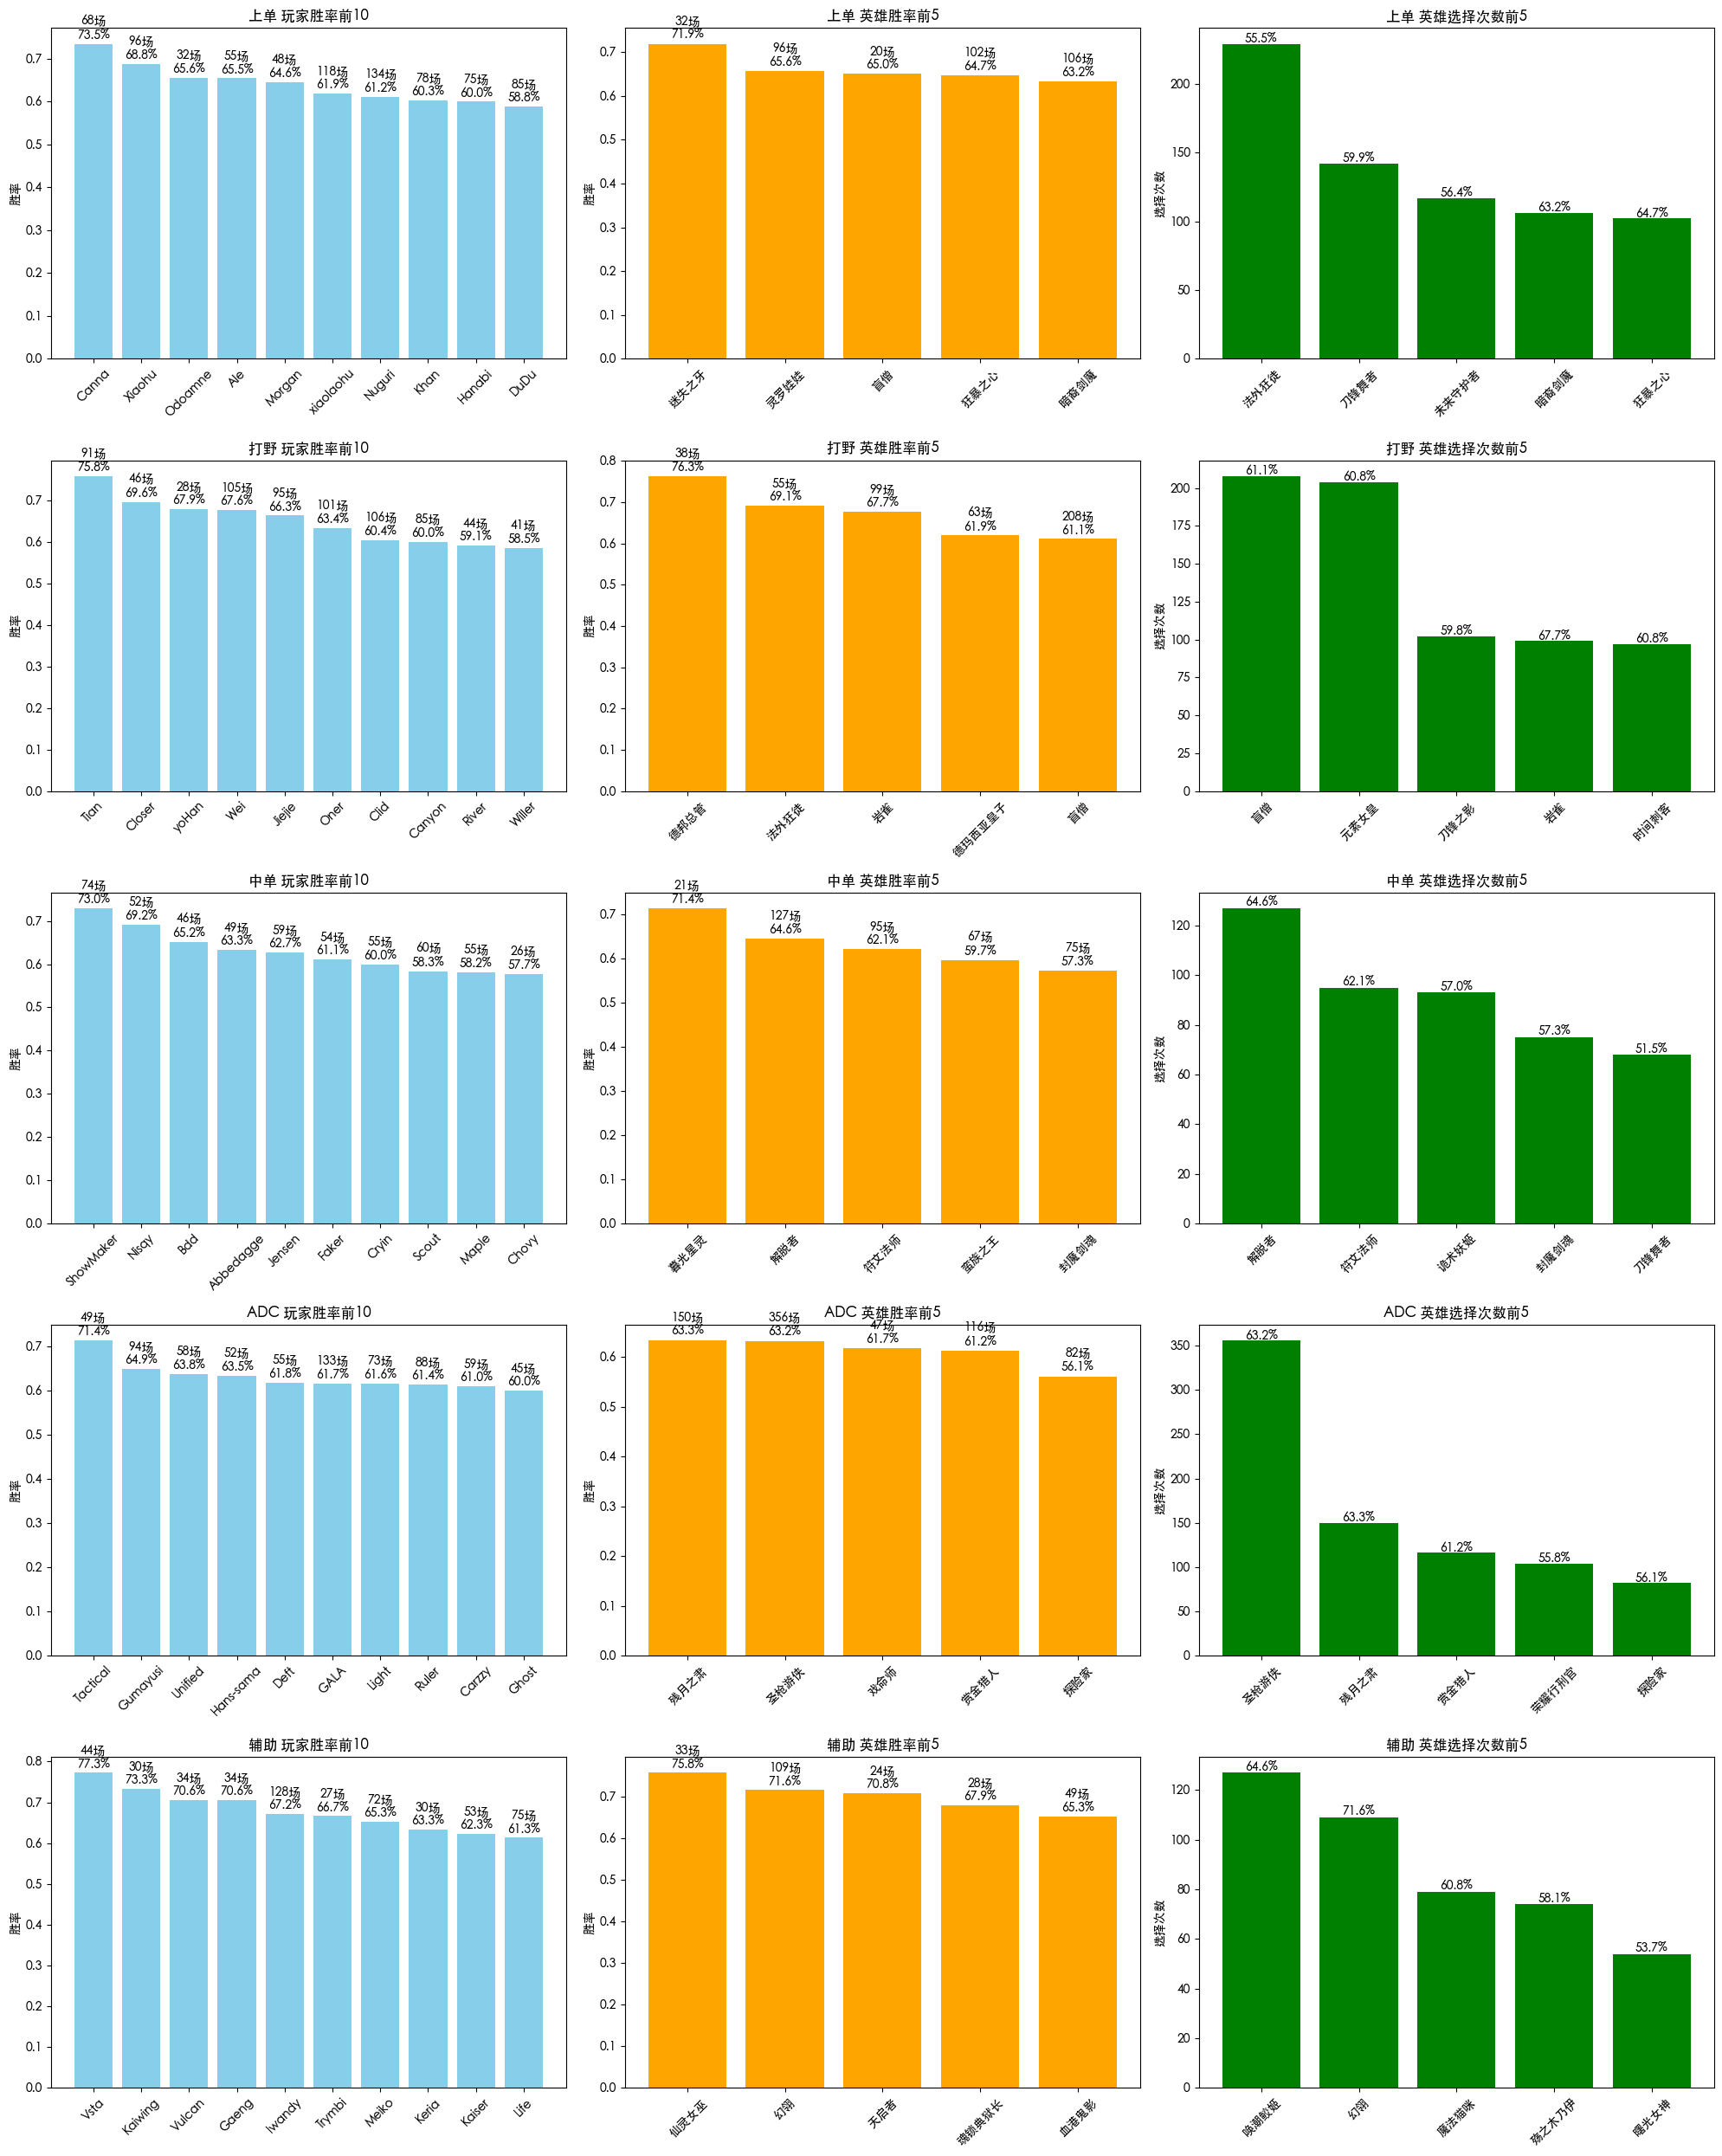

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 中文字体
plt.rcParams['font.family'] = 'Heiti TC'  # 替换为你选择的字体

# 读取数据
df = pd.read_csv("./esports dataset/my/games_player_champion_combined.csv")
win_cols = ['win1','win2','win3','win4','win5']
lose_cols = ['lose1','lose2','lose3','lose4','lose5']
pos_map = {0:'上单', 1:'打野', 2:'中单', 3:'ADC', 4:'辅助'}

# 统计数据
position_player_stats = {i:{} for i in range(5)}
position_champ_stats = {i:{} for i in range(5)}

for idx, row in df.iterrows():
    for i in range(5):
        for col in [win_cols[i], lose_cols[i]]:
            val = row[col]
            if pd.notna(val) and val != "_NOOB_":
                player, champ = val.split('_')
                stats_player = position_player_stats[i].setdefault(player, {'win':0,'total':0})
                stats_champ = position_champ_stats[i].setdefault(champ, {'win':0,'total':0})
                if col in win_cols:
                    stats_player['win'] +=1
                    stats_champ['win'] +=1
                stats_player['total'] +=1
                stats_champ['total'] +=1

# 绘图
fig, axes = plt.subplots(5, 3, figsize=(20,25))
plt.subplots_adjust(hspace=0.6)

for i in range(5):
    # 玩家胜率前10
    data_player = [{'player': p, 'win': s['win'], 'total': s['total'], 'winrate': s['win']/s['total']}
                   for p,s in position_player_stats[i].items() if s['total']>=20]
    df_player = pd.DataFrame(data_player).sort_values(by='winrate', ascending=False).head(10)
    axes[i,0].bar(df_player['player'], df_player['winrate'], color='skyblue')
    axes[i,0].set_title(f"{pos_map[i]} 玩家胜率前10")
    axes[i,0].set_ylabel("胜率")
    axes[i,0].tick_params(axis='x', rotation=45)
    for idx,row in enumerate(df_player.itertuples()):
        axes[i,0].text(idx, row.winrate+0.01, f"{row.total}场\n{row.winrate*100:.1f}%", ha='center')

    # 英雄胜率前5
    data_champ = [{'champion': c, 'win': s['win'], 'total': s['total'], 'winrate': s['win']/s['total']}
                  for c,s in position_champ_stats[i].items() if s['total']>=20]
    df_champ_win = pd.DataFrame(data_champ).sort_values(by='winrate', ascending=False).head(5)
    axes[i,1].bar(df_champ_win['champion'], df_champ_win['winrate'], color='orange')
    axes[i,1].set_title(f"{pos_map[i]} 英雄胜率前5")
    axes[i,1].set_ylabel("胜率")
    axes[i,1].tick_params(axis='x', rotation=45)
    for idx,row in enumerate(df_champ_win.itertuples()):
        axes[i,1].text(idx, row.winrate+0.01, f"{row.total}场\n{row.winrate*100:.1f}%", ha='center')

    # 英雄选择次数前5
    df_champ_count = pd.DataFrame(data_champ).sort_values(by='total', ascending=False).head(5)
    axes[i,2].bar(df_champ_count['champion'], df_champ_count['total'], color='green')
    axes[i,2].set_title(f"{pos_map[i]} 英雄选择次数前5")
    axes[i,2].set_ylabel("选择次数")
    axes[i,2].tick_params(axis='x', rotation=45)
    for idx,row in enumerate(df_champ_count.itertuples()):
        axes[i,2].text(idx, row.total+0.5, f"{row.winrate*100:.1f}%", ha='center')

plt.tight_layout()
plt.show()
